# Standard Imports

In [4]:
import numpy as np #for numerical computations
import pandas as pd #for dataframes 

import datetime

import missingno as msno #visualizing the missing values

import matplotlib.pyplot as plt #for creating visualizations
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import ast

import warnings #for ignoring the warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize #package for flattening json in pandas df

# Loading the Data

In [5]:
data = pd.read_csv("train.csv")

# Data Preprocessing

In [6]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

# taken from kaggle

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

data = text_to_dict(data)

In [7]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Column - belongs_to_collection

In [8]:
data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [9]:
data['collection_name'] = data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
data['has_collection'] = data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

## Column - Genres

In [10]:
data["genres"].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [11]:
for i, e in enumerate(data["genres"][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [12]:
print("Number of genres in films")
data["genres"].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [13]:
list_of_genres = list(data['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [16]:
list_of_genres

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

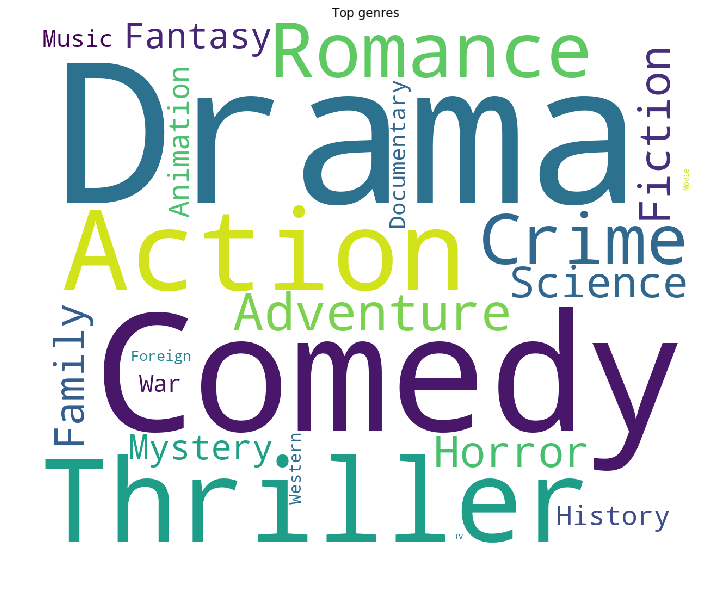

In [17]:
from wordcloud import WordCloud
plt.figure(figsize = (15, 10))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [18]:
from collections import Counter
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [19]:
data['num_genres'] = data['genres'].apply(lambda x: len(x) if x != {} else 0)

In [20]:
data['all_genres'] = data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

In [21]:
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]

In [22]:
for g in top_genres:
    data['genre_' + g] = data['all_genres'].apply(lambda x: 1 if g in x else 0)
    
data = data.drop(['genres'], axis=1)

## Column - Production Company

In [151]:
data["production_companies"].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                   {}
4                                                   {}
Name: production_companies, dtype: object

In [150]:
for i, e in enumerate(data['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [153]:
print("Number of Production companies in films")
data["production_companies"].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of Production companies in films


1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

Most of the movies have production companies somewhere between 1 to 6. But there are few movies which have more than 11 production companies as well.
Let's have a look at them: 

In [157]:
data[data['production_companies'].apply(lambda x: len(x) if x != {} else 0) > 11]

,id,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music
31,32,{},0,http://www.cache-derfilm.at,tt0387898,fr,Caché,A married couple is terrorized by a series of ...,5.695860,/i1Zl8S4DgM3IDLW5dhZzBnIdCOe.jpg,...,0,0,0,0,0,0,1,0,0,0
116,117,{},0,NaN,tt2113822,zh,一九四二,"In 1942, Henan Province was devastated by the ...",1.678013,/xxz2gi8vijqqJySGO3kQy2i8mv.jpg,...,0,0,0,0,0,0,0,0,0,0
363,364,{},15400000,NaN,tt2053425,fr,De rouille et d'os,"Put in charge of his young son, Ali leaves Bel...",8.400049,/cHCwW8xPl8yPKQwpNzKVinwvirT.jpg,...,0,0,0,0,0,0,0,0,0,0
392,393,{},0,NaN,tt5072406,fr,Moka,Diane Kramer is led by one obsession: to find ...,2.404466,/5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg,...,0,0,0,0,0,0,0,0,0,0
449,450,{},80000000,http://asoundofthunder.warnerbros.com/,tt0318081,en,A Sound of Thunder,When a hunter sent back to the prehistoric era...,4.980191,/gsqOX1ReJ5lcmTuDdkhOXLug8Ug.jpg,...,0,1,0,1,0,0,0,0,0,0
554,555,{},14500000,NaN,tt0293416,ja,Metropolis,Duke Red has overseen the construction of a ma...,9.298092,/1EK7mGCpRKYmSg25FaojvnS9opm.jpg,...,0,0,0,1,0,0,0,1,0,0
1079,1080,{},7000000,NaN,tt2737050,fr,"Deux jours, une nuit",Sandra is a young woman who has only one weeke...,6.868022,/1mYAejpMskvskGr0J0SaBvdjmrH.jpg,...,0,0,0,0,0,0,0,0,0,0
2170,2171,{},4000000,http://tickets.picturehouseentertainment.co.uk...,tt3464902,en,The Lobster,"In a dystopian near future, single people, acc...",11.223033,/yR60EqMGS9hHq9I5Pkq2hG984TP.jpg,...,0,0,0,1,0,0,0,0,0,0
2395,2396,{},0,NaN,tt4082068,fr,Dheepan,Dheepan is a Sri Lankan Tamil warrior who flee...,5.752416,/lgONuekbRlM0eMvMHJBEDL6MsBP.jpg,...,1,0,0,0,0,0,0,0,0,0
2517,2518,"[{'id': 2396, 'name': 'Asterix and Obelix Coll...",97250400,http://www.asterixauxjeuxolympiques.com/index.php,tt0463872,fr,Astérix aux Jeux Olympiques,Ast√©rix and Ob√©lix have to win the Olympic G...,9.671944,/tKL0RJOeuccc1rrpcDKg8qhedIz.jpg,...,0,1,0,0,1,1,0,0,0,0


An example of a film having more than 11 production companies

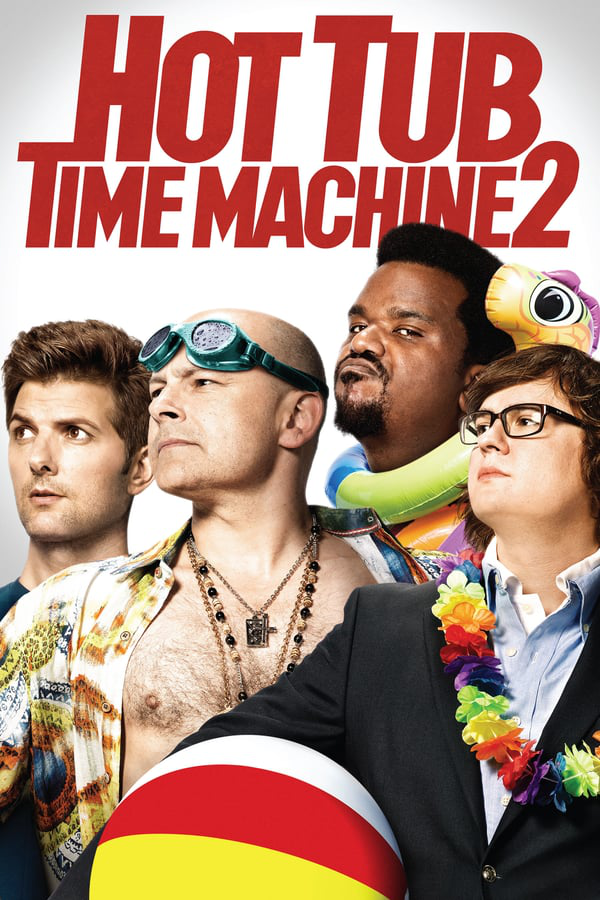

In [162]:
from PIL import Image
from urllib.request import urlopen

img = Image.open(urlopen("https://image.tmdb.org/t/p/w600_and_h900_bestv2//tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg"))
img

In [163]:
list_of_production_companies = list(data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)




In [165]:
Counter([i for j in list_of_production_companies for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

## Column - Production Countries

In [166]:
for i, e in enumerate(data['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [168]:
print('Number of production countries in films')
data["production_countries"].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries in films


1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

In [169]:
list_of_countries = list(data['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

Counter([i for j in list_of_countries for i in j]).most_common(25)



[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [171]:
data['num_countries'] = data['production_countries'].apply(lambda x: len(x) if x != {} else 0)

data['all_countries'] = data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]

for g in top_countries:
    data['production_country_' + g] = data['all_countries'].apply(lambda x: 1 if g in x else 0)
    
data = data.drop(['production_countries', 'all_countries'], axis=1)    
    
    

## Column - Spoken Languages

In [172]:
for i, e in enumerate(data['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [173]:
print('Number of spoken languages in films')
data["spoken_languages"].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [174]:
list_of_languages = list(data['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

Counter([i for j in list_of_languages for i in j]).most_common(15)


[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [176]:
data['num_languages'] = data['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

data['all_languages'] = data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]

for g in top_languages:
    data['language_' + g] = data['all_languages'].apply(lambda x: 1 if g in x else 0)
    
    

## Column - Key Words

In [178]:
for i, e in enumerate(data['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [180]:
print('Number of keywords in films')
data["Keywords"].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of keywords in films


5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
14      59
15      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
32       2
28       2
30       2
31       2
29       2
37       2
43       1
40       1
38       1
33       1
97       1
39       1
149      1
Name: Keywords, dtype: int64

In [181]:
list_of_keywords = list(data['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

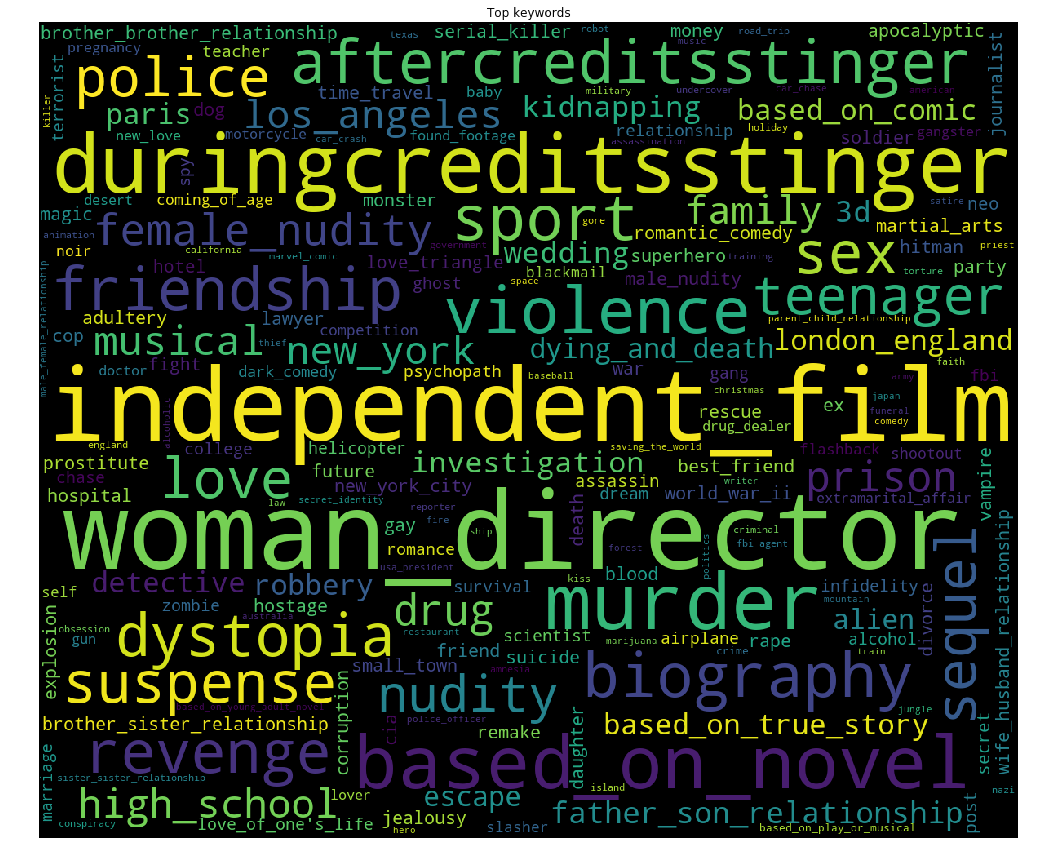

In [185]:
list_of_keywords = list(data['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (18, 15))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()